Распознанный текст:
 OpenCVv



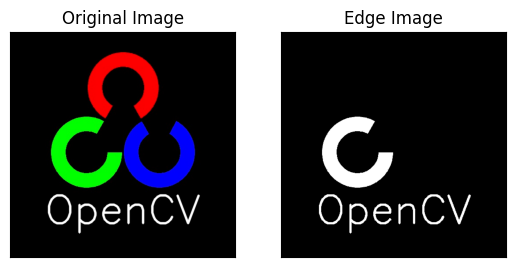

In [2]:
import cv2 as cv
import numpy as np
import pytesseract
from matplotlib import pyplot as plt

#https://geekyants.com/blog/exploring-optical-character-recognition-ocr-an-experiment-with-opencv-and-pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# 1. Загрузка изображения
img = cv.imread('../lab2/open-cv-logo.jpg')
assert img is not None, "Файл не найден."

# 2. Преобразуем в оттенки серого
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 3. Применяем бинаризацию для выделения текста 
gray = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

# 4. Удаляем шум с помощью морфологических операций 
kernel = np.ones((1, 1), np.uint8)
gray = cv.dilate(gray, kernel, iterations=1)
gray = cv.erode(gray, kernel, iterations=1)

# 5. OCR с использованием pytesseract 
text = pytesseract.image_to_string(gray)
print("Распознанный текст:\n", text)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(gray, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
